In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
master_df=pd.read_csv('data/master_df.csv')
portfolio=pd.read_csv('data/portfolio_cleaned.csv')

In [4]:
master_df

,customer_id,age,gender,income,years_member,offer_complete_status,offer_id,reward,difficulty,duration,email,mobile,social,web,bogo,informational,discount
0,4,75,F,100000,5,1,1,10,10,168,1,1,1,0,1,0,0
1,14,61,F,57000,5,1,1,10,10,168,1,1,1,0,1,0,0
2,15,26,M,46000,8,1,1,10,10,168,1,1,1,0,1,0,0
3,17,49,M,52000,8,1,1,10,10,168,1,1,1,0,1,0,0
4,20,61,F,40000,4,0,1,10,10,168,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,16982,84,M,93000,6,0,10,2,10,168,1,1,0,1,0,0,1
55218,16985,75,F,78000,6,0,10,2,10,168,1,1,0,1,0,0,1
55219,16989,64,M,51000,4,0,10,2,10,168,1,1,0,1,0,0,1
55220,16993,21,F,72000,5,0,10,2,10,168,1,1,0,1,0,0,1


<AxesSubplot:>

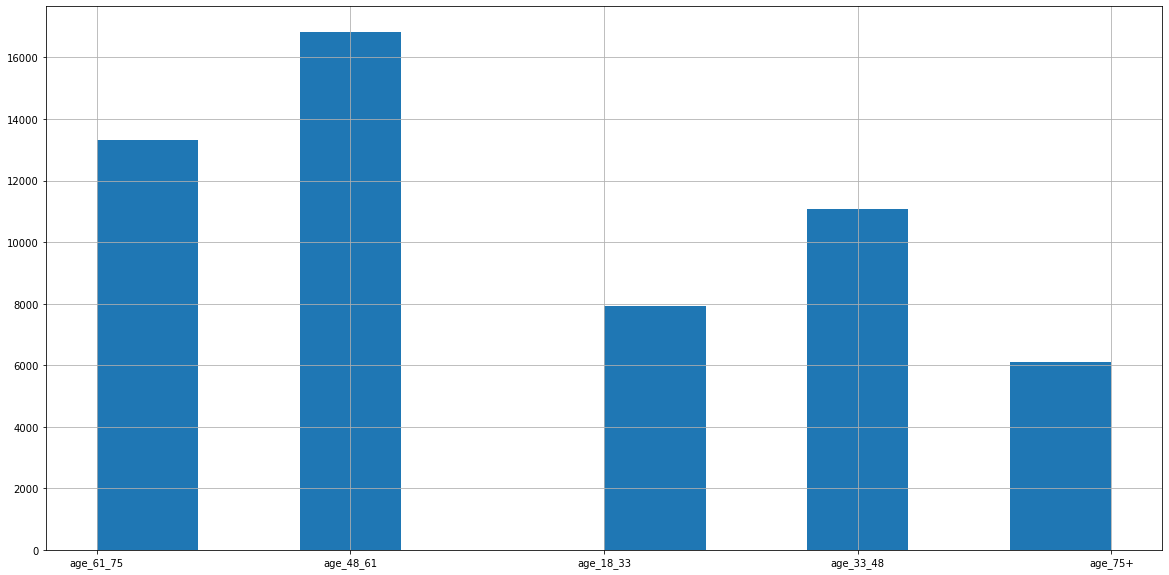

In [5]:
age_breaks=[17.9,33.1,48.1,61.1,75.1,102]
age_labels=['age_18_33','age_33_48','age_48_61','age_61_75','age_75+']
master_df['age_bin'] = pd.cut(master_df['age'] , bins=age_breaks, labels=age_labels, include_lowest=True)
master_df['age_bin'].hist(figsize=(20,10))

<AxesSubplot:>

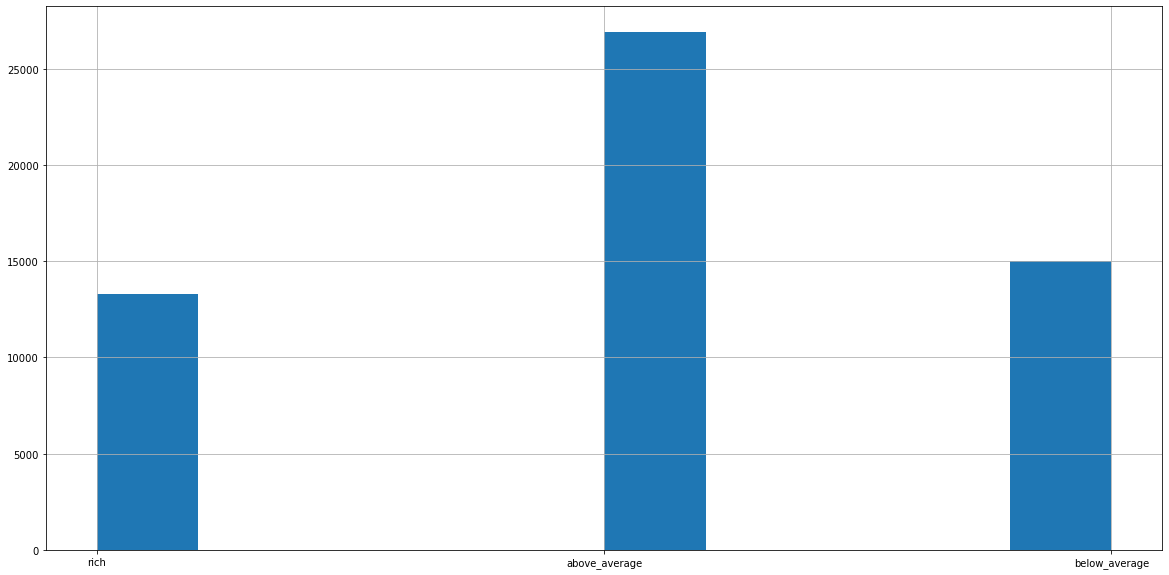

In [6]:
income_breaks=[0,50000.1,80000.1,120000.1]
income_labels=['below_average','above_average','rich']
master_df['income_bin'] = pd.cut(master_df['income'] , bins=income_breaks, labels=income_labels, include_lowest=True)
master_df['income_bin'].hist(figsize=(20,10))

<AxesSubplot:>

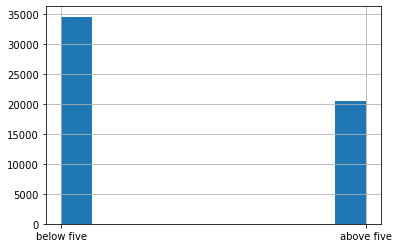

In [7]:
years_member_breaks=[0,5.1,9.1]
years_member_labels=['below five','above five']
master_df['years_member_bin'] = pd.cut(master_df['years_member'] , bins=years_member_breaks, labels=years_member_labels, include_lowest=True)
master_df['years_member_bin'].hist()

<AxesSubplot:>

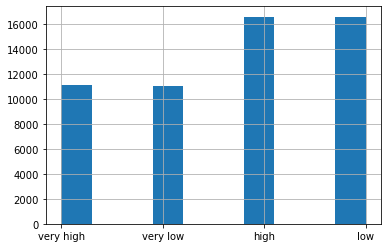

In [8]:
reward_breaks=[0.0,1.9,4.1,6.1,10.1]
reward_labels=['very low','low','high','very high']
master_df['reward_bin'] = pd.cut(master_df['reward'] , bins=reward_breaks, labels=reward_labels, include_lowest=True)
master_df['reward_bin'].hist()

<AxesSubplot:>

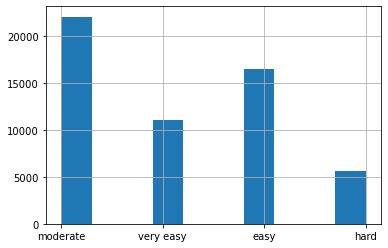

In [9]:
difficulty_breaks=[0.0,4.9,7.1,10.1,20.1]
difficulty_labels=['very easy','easy','moderate','hard']
master_df['difficulty_bin'] = pd.cut(master_df['difficulty'] , bins=difficulty_breaks, labels=difficulty_labels, include_lowest=True)
master_df['difficulty_bin'].hist()

<AxesSubplot:>

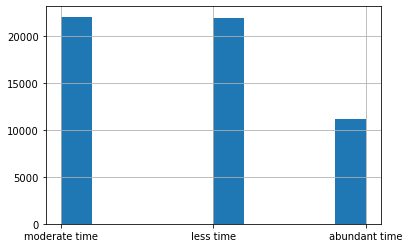

In [10]:
duration_breaks=[70,121,169,241]
duration_labels=['less time','moderate time','abundant time']
master_df['duration_bin'] = pd.cut(master_df['duration'] , bins=duration_breaks, labels=duration_labels, include_lowest=True)
master_df['duration_bin'].hist()

<AxesSubplot:>

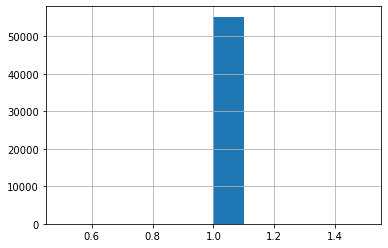

In [11]:
master_df['email'].hist()

As the value of email is always confined to 1, its better not to consider 'email' column

<AxesSubplot:>

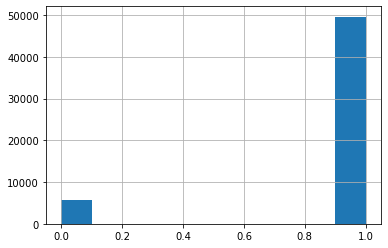

In [12]:
master_df['mobile'].hist()

<AxesSubplot:>

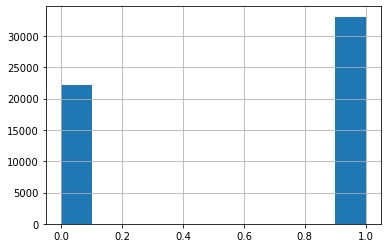

In [13]:
master_df['social'].hist()

<AxesSubplot:>

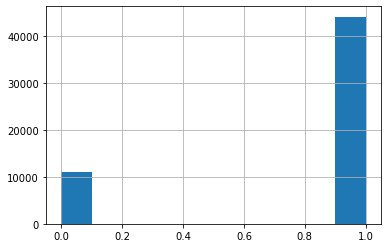

In [14]:
master_df['web'].hist()

In [15]:
columns=master_df.columns.to_list()

In [16]:
columns

['customer_id',
 'age',
 'gender',
 'income',
 'years_member',
 'offer_complete_status',
 'offer_id',
 'reward',
 'difficulty',
 'duration',
 'email',
 'mobile',
 'social',
 'web',
 'bogo',
 'informational',
 'discount',
 'age_bin',
 'income_bin',
 'years_member_bin',
 'reward_bin',
 'difficulty_bin',
 'duration_bin']

In [17]:
master_df.drop({'customer_id','age','income','years_member','offer_id','reward','difficulty','duration'},axis=1,inplace=True)

In [18]:
master_df[['gender','age_bin','income_bin','years_member_bin','reward_bin','difficulty_bin',
           'duration_bin','offer_complete_status','mobile','social','web','bogo','informational','discount']]

,gender,age_bin,income_bin,years_member_bin,reward_bin,difficulty_bin,duration_bin,offer_complete_status,mobile,social,web,bogo,informational,discount
0,F,age_61_75,rich,below five,very high,moderate,moderate time,1,1,1,0,1,0,0
1,F,age_48_61,above_average,below five,very high,moderate,moderate time,1,1,1,0,1,0,0
2,M,age_18_33,below_average,above five,very high,moderate,moderate time,1,1,1,0,1,0,0
3,M,age_48_61,above_average,above five,very high,moderate,moderate time,1,1,1,0,1,0,0
4,F,age_48_61,below_average,below five,very high,moderate,moderate time,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,M,age_75+,rich,above five,low,moderate,moderate time,0,1,0,1,0,0,1
55218,F,age_61_75,above_average,above five,low,moderate,moderate time,0,1,0,1,0,0,1
55219,M,age_61_75,above_average,below five,low,moderate,moderate time,0,1,0,1,0,0,1
55220,F,age_18_33,above_average,below five,low,moderate,moderate time,0,1,0,1,0,0,1


# Modeling

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


from collections import defaultdict
d = defaultdict(LabelEncoder)
master_df_ml=master_df.apply(lambda x: d[x.name].fit_transform(x))


In [20]:
master_df_ml

,gender,offer_complete_status,email,mobile,social,web,bogo,informational,discount,age_bin,income_bin,years_member_bin,reward_bin,difficulty_bin,duration_bin
0,0,1,0,1,1,0,1,0,0,3,2,1,2,2,2
1,0,1,0,1,1,0,1,0,0,2,0,1,2,2,2
2,1,1,0,1,1,0,1,0,0,0,1,0,2,2,2
3,1,1,0,1,1,0,1,0,0,2,0,0,2,2,2
4,0,0,0,1,1,0,1,0,0,2,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,1,0,0,1,0,1,0,0,1,4,2,0,1,2,2
55218,0,0,0,1,0,1,0,0,1,3,0,0,1,2,2
55219,1,0,0,1,0,1,0,0,1,3,0,1,1,2,2
55220,0,0,0,1,0,1,0,0,1,0,0,1,1,2,2


In [21]:
master_df_ml.apply(lambda x: d[x.name].inverse_transform(x))

,gender,offer_complete_status,email,mobile,social,web,bogo,informational,discount,age_bin,income_bin,years_member_bin,reward_bin,difficulty_bin,duration_bin
0,F,1,1,1,1,0,1,0,0,age_61_75,rich,below five,very high,moderate,moderate time
1,F,1,1,1,1,0,1,0,0,age_48_61,above_average,below five,very high,moderate,moderate time
2,M,1,1,1,1,0,1,0,0,age_18_33,below_average,above five,very high,moderate,moderate time
3,M,1,1,1,1,0,1,0,0,age_48_61,above_average,above five,very high,moderate,moderate time
4,F,0,1,1,1,0,1,0,0,age_48_61,below_average,below five,very high,moderate,moderate time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,M,0,1,1,0,1,0,0,1,age_75+,rich,above five,low,moderate,moderate time
55218,F,0,1,1,0,1,0,0,1,age_61_75,above_average,above five,low,moderate,moderate time
55219,M,0,1,1,0,1,0,0,1,age_61_75,above_average,below five,low,moderate,moderate time
55220,F,0,1,1,0,1,0,0,1,age_18_33,above_average,below five,low,moderate,moderate time


In [22]:
X=master_df_ml[['gender','age_bin','income_bin','years_member_bin','reward_bin','difficulty_bin','duration_bin',
             'mobile','social','web','email','bogo','informational','discount']]
y=master_df_ml['offer_complete_status']

In [23]:
X

,gender,age_bin,income_bin,years_member_bin,reward_bin,difficulty_bin,duration_bin,mobile,social,web,email,bogo,informational,discount
0,0,3,2,1,2,2,2,1,1,0,0,1,0,0
1,0,2,0,1,2,2,2,1,1,0,0,1,0,0
2,1,0,1,0,2,2,2,1,1,0,0,1,0,0
3,1,2,0,0,2,2,2,1,1,0,0,1,0,0
4,0,2,1,1,2,2,2,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55217,1,4,2,0,1,2,2,1,0,1,0,0,0,1
55218,0,3,0,0,1,2,2,1,0,1,0,0,0,1
55219,1,3,0,1,1,2,2,1,0,1,0,0,0,1
55220,0,0,0,1,1,2,2,1,0,1,0,0,0,1


In [24]:
y

0        1
1        1
2        1
3        1
4        0
        ..
55217    0
55218    0
55219    0
55220    0
55221    0
Name: offer_complete_status, Length: 55222, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import f1_score,confusion_matrix, classification_report,accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [26]:
def train_n_results(model,X_train,y_train,X_test):
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    labels=np.unique(y_train)
    print("Accuracy on train", accuracy_score(y_train, y_train_pred))
    print("Classification report on train\n", classification_report(y_train, y_train_pred, labels = labels))
    print("=================================================================")
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred, labels = labels))
    print("f1 Score",f1_score(y_test, y_pred))
    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_matrix(y_test.values, y_pred, labels = labels))
    return model,y_pred

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc =RandomForestClassifier(random_state=10)
model,y_pred=train_n_results(rfc,X_train,y_train,X_test)

Accuracy on train 0.6885257034203318
Classification report on train
               precision    recall  f1-score   support

           0       0.66      0.63      0.64     19721
           1       0.71      0.74      0.72     24456

    accuracy                           0.69     44177
   macro avg       0.68      0.68      0.68     44177
weighted avg       0.69      0.69      0.69     44177

              precision    recall  f1-score   support

           0       0.64      0.61      0.63      4958
           1       0.70      0.72      0.71      6087

    accuracy                           0.67     11045
   macro avg       0.67      0.67      0.67     11045
weighted avg       0.67      0.67      0.67     11045

f1 Score 0.7082527401676338
Labels: [0 1]
Confusion Matrix:
 [[3031 1927]
 [1693 4394]]


In [28]:
#prob=model.predict_proba([[0,3,2,1,2,2,2,1,1,0,0,1,0,0]])[0][1]

In [29]:
labels=np.unique(y_train)
cm=confusion_matrix(y_test.values, y_pred, labels = labels)
report=classification_report(y_test, y_pred, labels = labels)

In [30]:
importance = model.feature_importances_

In [31]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

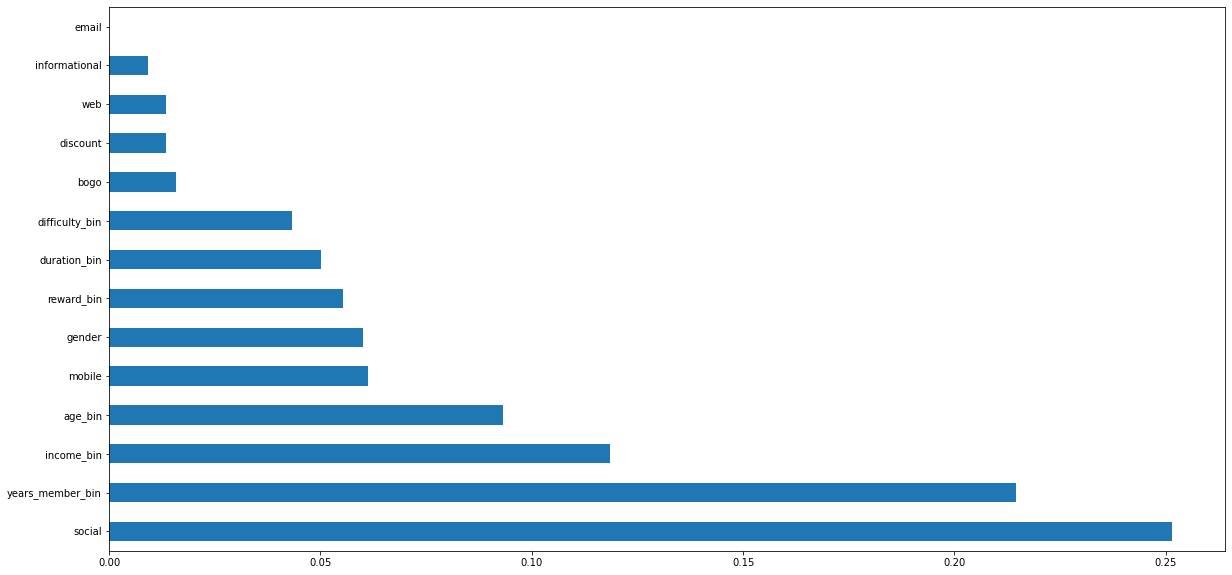

In [32]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(20,10))

gender,age,income
M,y(18-24),LI
M,y(18-24),M
M,y(18-24),R
M,y(18-24),

In [33]:
feat_importances

gender              0.060005
age_bin             0.093317
income_bin          0.118628
years_member_bin    0.214549
reward_bin          0.055282
difficulty_bin      0.043242
duration_bin        0.050231
mobile              0.061235
social              0.251461
web                 0.013415
email               0.000000
bogo                0.015944
informational       0.009229
discount            0.013461
dtype: float64

In [34]:
rfc = RandomForestClassifier(random_state=10)
X=master_df_ml[['gender','age_bin','income_bin','years_member_bin','reward_bin','difficulty_bin','duration_bin',
             'mobile','social','web','bogo','informational','discount']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
model,y_pred=train_n_results(rfc,X_train,y_train,X_test)

Accuracy on train 0.6885257034203318
Classification report on train
               precision    recall  f1-score   support

           0       0.66      0.63      0.64     19721
           1       0.71      0.74      0.72     24456

    accuracy                           0.69     44177
   macro avg       0.68      0.68      0.68     44177
weighted avg       0.69      0.69      0.69     44177

              precision    recall  f1-score   support

           0       0.64      0.61      0.63      4958
           1       0.70      0.72      0.71      6087

    accuracy                           0.67     11045
   macro avg       0.67      0.67      0.67     11045
weighted avg       0.67      0.67      0.67     11045

f1 Score 0.7083568377790314
Labels: [0 1]
Confusion Matrix:
 [[3031 1927]
 [1692 4395]]


<AxesSubplot:>

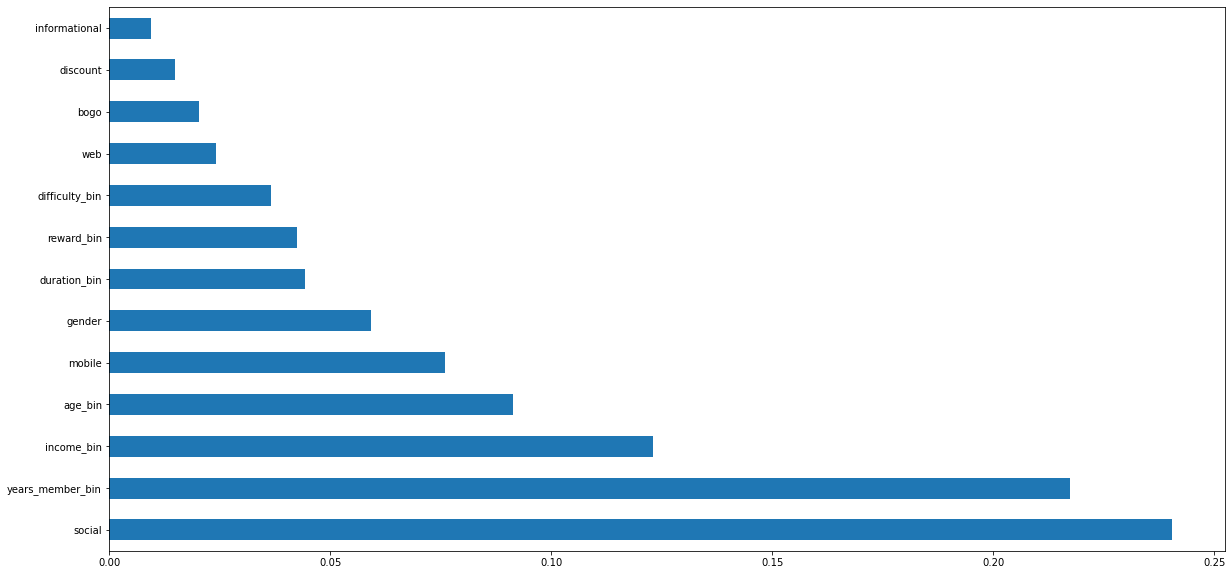

In [35]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(20,10))

In [36]:
# If a model is used, the following should hold: The final model’s qualities — such as parameters — are evaluated in detail.

# Some type of analysis is used to validate the robustness of the model’s solution. For example, you can use cross-validation to find the best parameters.

# Show and compare the results using different models, parameters, or techniques in tabular forms or charts.



In [37]:
import pickle
filename='models/{}'.format(model.__class__.__name__)
pickle.dump(model, open(filename, 'wb'))

In [38]:
test_data=pd.read_csv('data/Starbucks_X_test.csv')

In [39]:
test_data['Age range'].value_counts()

18-33    18
33-48    18
48-61    18
61-75    18
75+      18
Name: Age range, dtype: int64

In [40]:
test_data['Income range'].value_counts()

30k-50k    30
50k-80k    30
80k+       30
Name: Income range, dtype: int64

In [41]:
#creating dicts to map according to the train data
age_range_dict={'18-33':'age_18_33','33-48':'age_33_48','48-61':'age_48_61','61-75':'age_61_75','75+':'age_75+'}
gender_dict={'Male':'M','Female':'F','Others':'O'}
income_dict={'30k-50k':'below_average','50k-80k':'above_average','80k+':'rich'}
membership_dict={'<=5 years':'below five','>5 years':'above five'}


In [42]:
test_data['Age range']=test_data['Age range'].map(age_range_dict)
test_data['Gender']=test_data['Gender'].map(gender_dict)
test_data['Income range']=test_data['Income range'].map(income_dict)
test_data['Member ship']=test_data['Member ship'].map(membership_dict)

In [43]:
test_data

,Age range,Gender,Income range,Member ship,Offer Details
0,age_18_33,M,below_average,below five,NaN
1,age_33_48,M,below_average,below five,NaN
2,age_48_61,M,below_average,below five,NaN
3,age_61_75,M,below_average,below five,NaN
4,age_75+,M,below_average,below five,NaN
...,...,...,...,...,...
85,age_18_33,O,rich,above five,NaN
86,age_33_48,O,rich,above five,NaN
87,age_48_61,O,rich,above five,NaN
88,age_61_75,O,rich,above five,NaN


In [44]:
test_data.drop({'Offer Details'},axis=1,inplace=True)

In [45]:
test_data.rename({'Age range':'age_bin','Gender':'gender','Income range':'income_bin','Member ship':'years_member_bin',},axis=1,inplace=True)

In [46]:
test_data=test_data.apply(lambda x: d[x.name].transform(x))

In [47]:
test_data.head(5)

,age_bin,gender,income_bin,years_member_bin
0,0,1,1,1
1,1,1,1,1
2,2,1,1,1
3,3,1,1,1
4,4,1,1,1


In [48]:
test_data.apply(lambda x: d[x.name].inverse_transform(x)).head(5)

,age_bin,gender,income_bin,years_member_bin
0,age_18_33,M,below_average,below five
1,age_33_48,M,below_average,below five
2,age_48_61,M,below_average,below five
3,age_61_75,M,below_average,below five
4,age_75+,M,below_average,below five


In [49]:
test_data=test_data[['gender','age_bin','income_bin','years_member_bin']]

In [50]:

portfolio_ml=portfolio.copy()

In [51]:

portfolio_ml['reward_bin'] = pd.cut(portfolio_ml['reward'] , bins=reward_breaks, labels=reward_labels, include_lowest=True)

portfolio_ml['difficulty_bin'] = pd.cut(portfolio_ml['difficulty'] , bins=difficulty_breaks, labels=difficulty_labels, include_lowest=True)


portfolio_ml['duration_bin'] = pd.cut(portfolio_ml['duration'] , bins=duration_breaks, labels=duration_labels, include_lowest=True)

portfolio_ml.drop({'offer_id','reward','difficulty','duration'},axis=1,inplace=True)

In [52]:
portfolio_ml=portfolio_ml.apply(lambda x: d[x.name].transform(x))

In [53]:
#arranging the columns according to the train data
portfolio_ml=portfolio_ml[['reward_bin','difficulty_bin','duration_bin',
             'mobile','social','web','bogo','informational','discount']]


In [54]:
portfolio_ml

,reward_bin,difficulty_bin,duration_bin,mobile,social,web,bogo,informational,discount
0,2,2,2,1,1,0,1,0,0
1,2,2,1,1,1,1,1,0,0
2,3,3,1,1,0,1,0,1,0
3,0,0,2,1,0,1,1,0,0
4,0,1,0,0,0,1,0,0,1
5,1,0,2,1,1,1,0,0,1
6,1,2,0,1,1,1,0,0,1
7,3,3,1,1,1,0,0,1,0
8,0,0,1,1,1,1,1,0,0
9,1,2,2,1,0,1,0,0,1


In [55]:
test_data_ml=test_data[['gender','age_bin','income_bin','years_member_bin']].copy()

binned user demographic test set
for user in usertestset:
    maxprobableofferprobility=0
    maxprobableoffer=None
    for offer in offers:
        append user vector with offer vector 
        pass it to the classifer
        pull out the 1 probability
        if 1_porbability > maxprobableofferprobility:
            maxprobableofferprobility=1_probability
            maxprobableoffer=offer
    user['best_offer']=maxprobableoffer
    user['best_offer_probability']=maxprobableofferprobility
            
        
        

In [56]:
model.predict_proba([[1,0,1,1,2,2,2,1,1,0,1,0,0]])[0][1] #offer 1


0.3907522765236251

In [57]:
#changing dataframe index to start from one
portfolio_ml.index = np.arange(1, len(portfolio_ml)+1)
test_data_ml.index = np.arange(1, len(test_data_ml)+1)

In [58]:
for (test_data_index,gender,age_bin,income_bin,years_member_bin) in test_data_ml.itertuples():
    max_prob_of_offer=0.0
    max_prob_offer=None
    for (portfolio_index,reward_bin,difficulty_bin,duration_bin,mobile,social,web,bogo,informational,discount) in portfolio_ml.itertuples():
        current_offer_prob=model.predict_proba([[gender,age_bin,income_bin,years_member_bin,reward_bin,difficulty_bin,duration_bin,mobile,social,web,bogo,informational,discount]])[0][1]
        if current_offer_prob>max_prob_of_offer:
            max_prob_of_offer=current_offer_prob
            max_prob_offer=portfolio_index
    #print("The maximum probability among all the offers is {} for the offer {} for the demograhic with the id {}".format(max_prob_of_offer,max_prob_offer,test_data_index))
    #print("=====================================================================================")
    #test_data['max_prob_offer']=max_prob_offer
    #test_data['max_prob_of_offer']=max_prob_of_offer
    test_data_ml.at[test_data_index, 'max_prob_offer']=int(max_prob_offer)
    test_data_ml.at[test_data_index, 'max_prob_of_offer']=float("{0:.2f}".format(max_prob_of_offer))
           

In [59]:
test_data_ml['max_prob_offer']=test_data_ml['max_prob_offer'].astype(int)

In [60]:
test_data_ml

,gender,age_bin,income_bin,years_member_bin,max_prob_offer,max_prob_of_offer
1,1,0,1,1,8,0.69
2,1,1,1,1,8,0.68
3,1,2,1,1,8,0.66
4,1,3,1,1,8,0.69
5,1,4,1,1,8,0.76
...,...,...,...,...,...,...
86,2,0,2,0,7,0.95
87,2,1,2,0,2,1.00
88,2,2,2,0,7,0.99
89,2,3,2,0,7,0.97


In [61]:
test_data_ml[['gender','age_bin','income_bin','years_member_bin']]=test_data_ml[['gender','age_bin','income_bin','years_member_bin']].apply(lambda x: d[x.name].inverse_transform(x))

In [62]:
test_data_ml

,gender,age_bin,income_bin,years_member_bin,max_prob_offer,max_prob_of_offer
1,M,age_18_33,below_average,below five,8,0.69
2,M,age_33_48,below_average,below five,8,0.68
3,M,age_48_61,below_average,below five,8,0.66
4,M,age_61_75,below_average,below five,8,0.69
5,M,age_75+,below_average,below five,8,0.76
...,...,...,...,...,...,...
86,O,age_18_33,rich,above five,7,0.95
87,O,age_33_48,rich,above five,2,1.00
88,O,age_48_61,rich,above five,7,0.99
89,O,age_61_75,rich,above five,7,0.97


In [63]:
age_range_dict_remap = {y:x for x,y in age_range_dict.items()}
gender_dict_remap = {y:x for x,y in gender_dict.items()}
income_dict_remap = {y:x for x,y in income_dict.items()}
membership_dict_remap = {y:x for x,y in membership_dict.items()}


In [64]:
test_data_ml['age_bin']=test_data_ml['age_bin'].map(age_range_dict_remap)
test_data_ml['gender']=test_data_ml['gender'].map(gender_dict_remap)
test_data_ml['income_bin']=test_data_ml['income_bin'].map(income_dict_remap)
test_data_ml['years_member_bin']=test_data_ml['years_member_bin'].map(membership_dict_remap)

<AxesSubplot:>

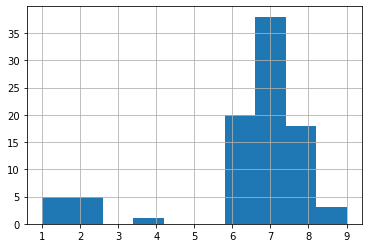

In [65]:
test_data_ml['max_prob_offer'].hist()

In [66]:
test_data_ml

,gender,age_bin,income_bin,years_member_bin,max_prob_offer,max_prob_of_offer
1,Male,18-33,30k-50k,<=5 years,8,0.69
2,Male,33-48,30k-50k,<=5 years,8,0.68
3,Male,48-61,30k-50k,<=5 years,8,0.66
4,Male,61-75,30k-50k,<=5 years,8,0.69
5,Male,75+,30k-50k,<=5 years,8,0.76
...,...,...,...,...,...,...
86,Others,18-33,80k+,>5 years,7,0.95
87,Others,33-48,80k+,>5 years,2,1.00
88,Others,48-61,80k+,>5 years,7,0.99
89,Others,61-75,80k+,>5 years,7,0.97


In [68]:
test_data_ml.to_csv('data/final_results.csv',index=False,mode='w+')

In [71]:
test_data_ml[test_data_ml['max_prob_of_offer']==1.0]

,gender,age_bin,income_bin,years_member_bin,max_prob_offer,max_prob_of_offer
27,Others,33-48,50k-80k,<=5 years,6,1.0
43,Others,48-61,80k+,<=5 years,2,1.0
50,Male,75+,30k-50k,>5 years,7,1.0
52,Female,33-48,30k-50k,>5 years,1,1.0
66,Female,18-33,50k-80k,>5 years,7,1.0
72,Others,33-48,50k-80k,>5 years,7,1.0
73,Others,48-61,50k-80k,>5 years,6,1.0
74,Others,61-75,50k-80k,>5 years,1,1.0
82,Female,33-48,80k+,>5 years,7,1.0
87,Others,33-48,80k+,>5 years,2,1.0


In [73]:
bogo=[1,2,4,9]
test_data_ml[test_data_ml['max_prob_offer'].isin(bogo)] #bogo

,gender,age_bin,income_bin,years_member_bin,max_prob_offer,max_prob_of_offer
12,Others,33-48,30k-50k,<=5 years,9,0.96
21,Female,18-33,50k-80k,<=5 years,9,0.73
29,Others,61-75,50k-80k,<=5 years,2,0.99
30,Others,75+,50k-80k,<=5 years,1,0.87
42,Others,33-48,80k+,<=5 years,2,0.94
43,Others,48-61,80k+,<=5 years,2,1.00
44,Others,61-75,80k+,<=5 years,4,0.95
52,Female,33-48,30k-50k,>5 years,1,1.00
57,Others,33-48,30k-50k,>5 years,1,0.97
62,Male,33-48,50k-80k,>5 years,9,0.94


In [75]:
informational=[3,8]
test_data_ml[test_data_ml['max_prob_offer'].isin(informational)] #informational

,gender,age_bin,income_bin,years_member_bin,max_prob_offer,max_prob_of_offer
1,Male,18-33,30k-50k,<=5 years,8,0.69
2,Male,33-48,30k-50k,<=5 years,8,0.68
3,Male,48-61,30k-50k,<=5 years,8,0.66
4,Male,61-75,30k-50k,<=5 years,8,0.69
5,Male,75+,30k-50k,<=5 years,8,0.76
8,Female,48-61,30k-50k,<=5 years,8,0.75
9,Female,61-75,30k-50k,<=5 years,8,0.83
10,Female,75+,30k-50k,<=5 years,8,0.85
14,Others,61-75,30k-50k,<=5 years,8,0.99
15,Others,75+,30k-50k,<=5 years,8,0.89


In [76]:
discount=[5,6,7,10]
test_data_ml[test_data_ml['max_prob_offer'].isin(discount)] #discount

,gender,age_bin,income_bin,years_member_bin,max_prob_offer,max_prob_of_offer
6,Female,18-33,30k-50k,<=5 years,6,0.75
7,Female,33-48,30k-50k,<=5 years,6,0.69
11,Others,18-33,30k-50k,<=5 years,7,0.97
13,Others,48-61,30k-50k,<=5 years,7,0.94
17,Male,33-48,50k-80k,<=5 years,6,0.62
18,Male,48-61,50k-80k,<=5 years,7,0.67
20,Male,75+,50k-80k,<=5 years,7,0.67
22,Female,33-48,50k-80k,<=5 years,6,0.74
23,Female,48-61,50k-80k,<=5 years,6,0.78
24,Female,61-75,50k-80k,<=5 years,7,0.71


In [77]:
print("No of BOGO offers recommended :{}".format(test_data_ml[test_data_ml['max_prob_offer'].isin(bogo)].shape[0]))
print("No of Informational offers recommended :{}".format(test_data_ml[test_data_ml['max_prob_offer'].isin(informational)].shape[0]))
print("No of Discount offers recommended :{}".format(test_data_ml[test_data_ml['max_prob_offer'].isin(discount)].shape[0]))

No of BOGO offers recommended :14
No of Informational offers recommended :18
No of Discount offers recommended :58


For many demographic groups, discount looks like the most appropriate offer